# PART I: EDA & Data Preprocessing on Google App Store Rating Dataset

### 1. Import required libraries and read the dataset

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
df=pd.read_csv('Apps_data+(1).csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [55]:
df.shape

(10841, 13)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [57]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [58]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Check if there are any duplicate records in the dataset? if any drop them

#### Check for duplicate records.

In [59]:
df.duplicated().sum()

483

#### Drop duplicate records.

In [60]:
df.drop_duplicates(inplace=True)

## 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

#### Check unique categories in the 'Category' column

In [61]:
df['Category'].unique()
#to find the invalid category from Category column,we use unique() to see the category lists.

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

#### Drop rows with the invalid category value

In [62]:
df=df[df['Category'].isin(['1.9'])==False]
#using isin function to filter the invalid value from a column.

#### Confirm that invalid category '1.9' has been dropped

In [63]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

#### Check for missing values in the 'Rating' column.

In [64]:
df['Rating'].isnull().sum()

1465

#### Drop the missing values in the 'Rating' Column.

In [65]:
df=df.dropna(subset=['Rating'])
df.shape

(8892, 13)

#### Create a new column 'Rating_category'.

In [66]:
df['Rating_category']=df['Rating'].map(lambda x:'high' if x > 3.5 else 'low')
df['Rating_category']

0        high
1        high
2        high
3        high
4        high
         ... 
10834    high
10836    high
10837    high
10839    high
10840    high
Name: Rating_category, Length: 8892, dtype: object

## 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution

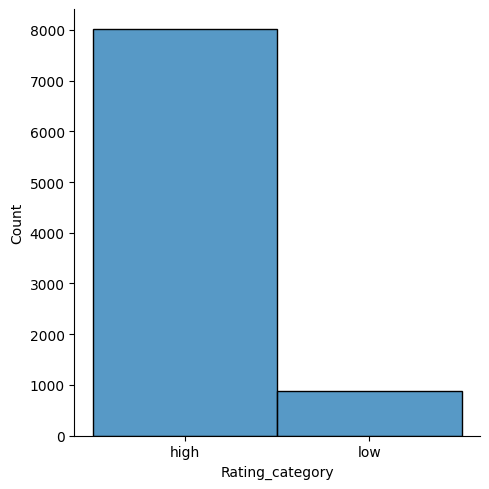

In [67]:
sns.displot(df['Rating_category'])
#to check the distribution, using seaborn.displot() for required column.
plt.show()

## 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

#### Convert the "Reviews" column to numeric data type

In [68]:
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int64

#### Check for the presence of outliers

<Axes: ylabel='Reviews'>

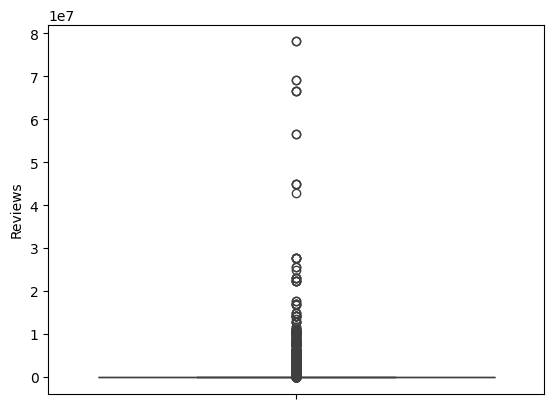

In [69]:
sns.boxplot(df['Reviews'])

#### Handling outliers using a log transformation

In [70]:
df['Reviews']=np.log1p(df['Reviews'])
#as mentioned above in question, using log transformation to handle the outliers by converting them into log values.
df['Reviews']

0         5.075174
1         6.875232
2        11.379520
3        12.281389
4         6.875232
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 8892, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

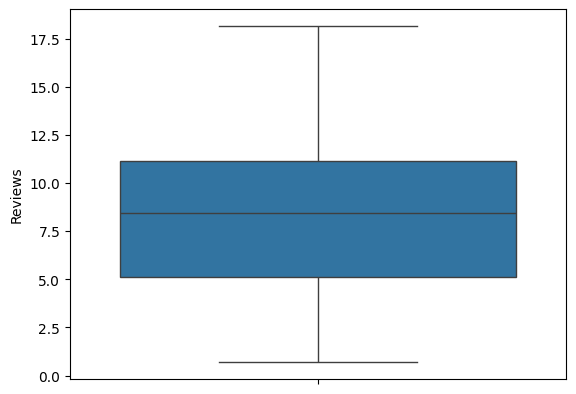

In [71]:
sns.boxplot(df['Reviews'])
#to check whether the outliers is minimized or not, using boxplot again.
plt.show

## 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [72]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [73]:
df=df[df['Size'].isin(['Varies with device'])==False]
#using isin() to eleminate the invaid data from Size column
df['Size'] = df['Size'].str.replace('M','*1000000').str.replace('k','*1000').map(eval)

In [74]:
df['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

## 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [75]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [76]:
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype('int')
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1])

## 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [77]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [78]:
df['Price']=df['Price'].str.replace('$','').astype('float')
df['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

## 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)

In [79]:
df=df.drop(['App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver'],axis=1)
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379520,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281389,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.875232,2800000.0,100000,Free,0.0,Everyone,high
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.806662,619000.0,1000,Free,0.0,Everyone,high
10834,FAMILY,2.079442,2600000.0,500,Free,0.0,Everyone,high
10836,FAMILY,3.663562,53000000.0,5000,Free,0.0,Everyone,high
10837,FAMILY,1.609438,3600000.0,100,Free,0.0,Everyone,high


## 13. Encode the categorical columns.

#### Categorical columns

In [81]:
catcols=df.select_dtypes(include='object').columns
catcols

Index(['Category', 'Type', 'Content Rating', 'Rating_category'], dtype='object')

#### Numerical columns

In [82]:
numcols=df.select_dtypes(exclude='object').columns
numcols

Index(['Reviews', 'Size', 'Installs', 'Price'], dtype='object')

### Ordinal Encoding

In [83]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df_encoded=pd.DataFrame(oe.fit_transform(df[catcols]),columns=df[catcols].columns)

In [87]:
df.reset_index(drop=True,inplace=True)

In [88]:
# after encoding we have to concat the encoded data to original data
df=pd.concat((df[numcols],df_encoded),axis='columns')
df

,Reviews,Size,Installs,Price,Category,Type,Content Rating,Rating_category
0,5.075174,19000000.0,10000,0.0,0.0,0.0,1.0,0.0
1,6.875232,14000000.0,500000,0.0,0.0,0.0,1.0,0.0
2,11.379520,8700000.0,5000000,0.0,0.0,0.0,1.0,0.0
3,12.281389,25000000.0,50000000,0.0,0.0,0.0,4.0,0.0
4,6.875232,2800000.0,100000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
7419,3.806662,619000.0,1000,0.0,3.0,0.0,1.0,0.0
7420,2.079442,2600000.0,500,0.0,11.0,0.0,1.0,0.0
7421,3.663562,53000000.0,5000,0.0,11.0,0.0,1.0,0.0
7422,1.609438,3600000.0,100,0.0,11.0,0.0,1.0,0.0


## 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [85]:
df.columns

Index(['Reviews', 'Size', 'Installs', 'Price', 'Category', 'Type',
       'Content Rating', 'Rating_category'],
      dtype='object')

In [89]:
X=df.drop(columns=['Rating_category'])
y=df['Rating_category']

## 15. Split the dataset into train and test.

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=555)

## 16. Standardize the data, so that the values are within a particular range.

In [93]:
from sklearn.preprocessing import MinMaxScaler
#importing minmax scaler to standardize the data at particular range i.e. 0 to 1.
mms=MinMaxScaler()
X_train=pd.DataFrame(mms.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(mms.fit_transform(X_test),columns=X_test.columns)

# PART II: Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.

### 1. Import required libraries and read the dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
hp=pd.read_csv('honeyproduction.csv')
hp

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [5]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [7]:
hp.shape

(626, 8)

In [8]:
hp.head(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


## 3. Display the percentage distribution of the data in each year using the pie chart.

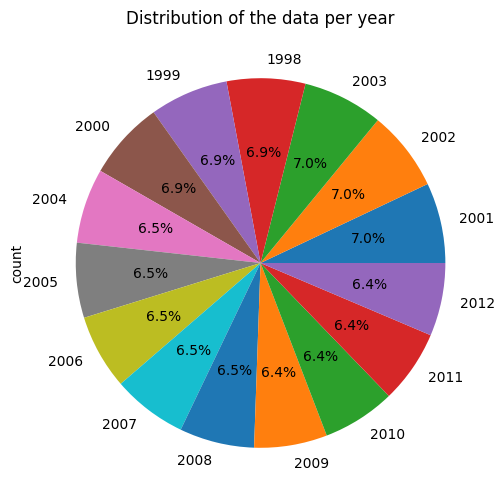

In [9]:
plt.figure(figsize=(8,6))
hp['year'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Distribution of the data per year')
plt.show()

## 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

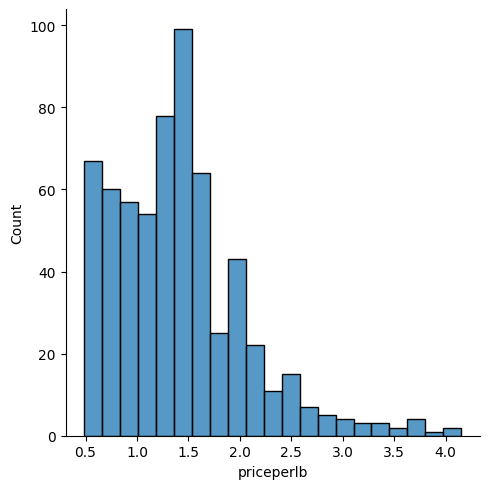

In [10]:
sns.displot(hp["priceperlb"])
plt.show()

#### The distribution of 'price per lb' column is positively skewed as the value of mean is higher than median value.

## 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

<function matplotlib.pyplot.show(close=None, block=None)>

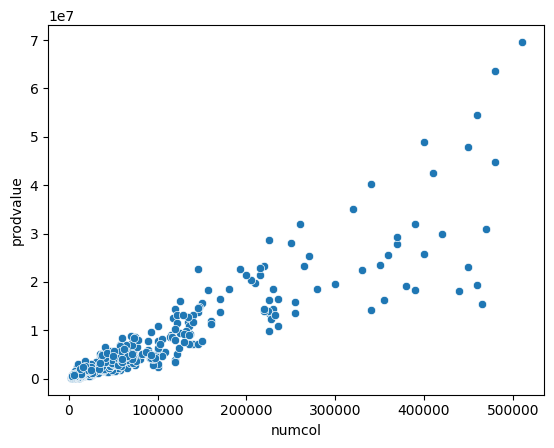

In [11]:
sns.scatterplot(data=hp,x='numcol',y='prodvalue')
plt.show

#### On seeing the scatter plot, the values of 'num col' and 'prod value' are positively correlated.

## 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

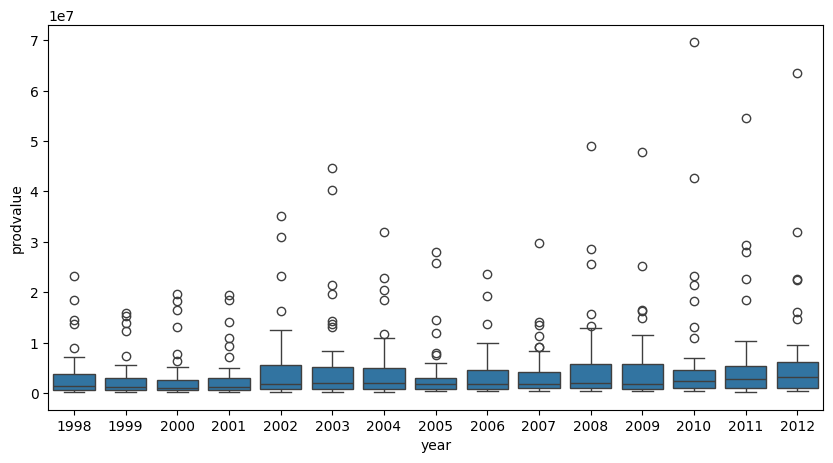

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=hp,x='year',y='prodvalue')
plt.show()

#### The values of 'prod value' from year 2010 are highly distributed, hence it has the larger outliers. Similarly year 1999 values has less distribution.

## 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

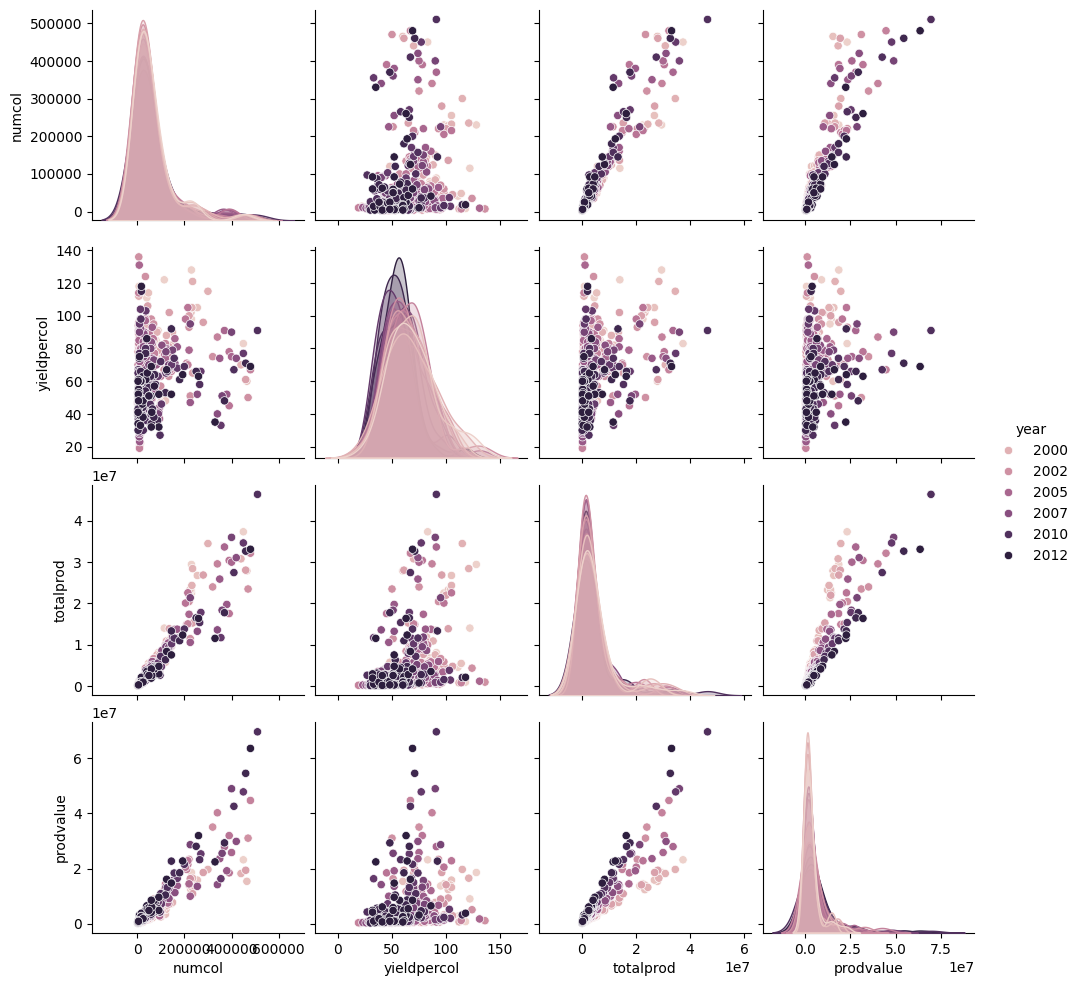

In [14]:
sns.pairplot(hp[['numcol','yieldpercol','totalprod','prodvalue','year']],hue='year')
plt.show()

## 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

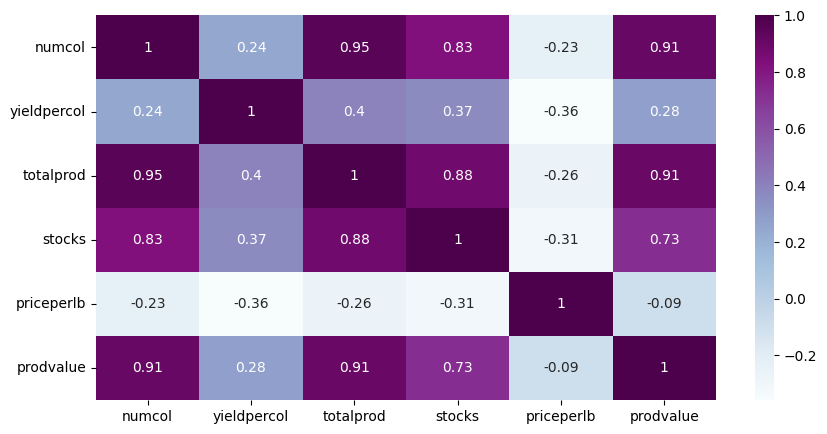

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(hp[['numcol','yieldpercol','totalprod','stocks','priceperlb','prodvalue']].corr(),annot=True,cmap='BuPu')
plt.show()

#### The values of 'total prod' and 'num col' are highly correlated with 0.95 & 'price per lb' and 'yield per col' having the less correlation with -0.36.